In [42]:
import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import clima_anom as ca

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

In [43]:
comm_name_in = 'Comm_IMERG_05x05_pearson_summer_noc'
shape_file_in = '../../communities/'+comm_name_in+'.shp'

In [44]:
comm_GPD = gpd.read_file('../../communities/'+comm_name_in+'.geojson')
len_comm = len(comm_GPD['Comm'])

lista_comunidades = np.zeros([len_comm,2])
index_comm = np.arange(len_comm)
lista_comunidades[:,0] = index_comm
lista_comunidades[:,1] = comm_GPD['Comm'].values

comm_GPD = comm_GPD.drop(['index'], axis=1)

print(f'Comm Len: {len_comm}')
comm_GPD.head(8)

Comm Len: 15


,Comm,lon,lat,geometry
0,10.0,-58.480651,-29.256809,"POLYGON ((-61.71364 -20.20833, -60.72273 -20.2..."
1,15.0,-57.861720,-2.545139,"POLYGON ((-57.75000 3.59167, -54.77727 3.59167..."
2,20.0,-41.850281,-13.637083,"POLYGON ((-39.91364 -7.31667, -38.42727 -7.316..."
3,25.0,-69.015226,-4.636619,"POLYGON ((-70.63182 -0.37500, -68.65000 -0.375..."
4,30.0,-53.929244,-23.713114,"POLYGON ((-58.24545 -18.72083, -56.75909 -18.7..."
5,35.0,-65.311980,-14.929249,"POLYGON ((-69.64091 -11.77917, -63.69545 -11.7..."
6,40.0,-66.730476,-40.930397,"POLYGON ((-68.65000 -37.06667, -68.15455 -37.0..."
7,50.0,-47.129807,-3.965333,"POLYGON ((-51.80455 -1.36667, -48.83182 -1.366..."


In [20]:
list_files = glob.glob('/media/arturo/Arturo/Data/GPM/AS/2018/*.nc')
list_files = sorted(list_files)
len_list = len(list_files)
print(len_list)

2101


In [54]:
data = ca.read_netcdf(list_files[7],2)
lat = data['NS_Latitude'].data
lon = data['NS_Longitude'].data
top = data['NS_PRE_heightStormTop'].data

NS_PRE_heightStormTop : (1893, 49)
NS_PRE_zFactorMeasured : (1893, 49, 176)
NS_SLV_zFactorCorrected : (1893, 49, 176)
NS_Latitude : (1893, 49)
NS_Longitude : (1893, 49)
NS_ScanTime_Year : (1893,)
NS_ScanTime_Month : (1893,)
NS_ScanTime_Day : (1893,)
NS_ScanTime_Hour : (1893,)
NS_ScanTime_Minute : (1893,)


/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


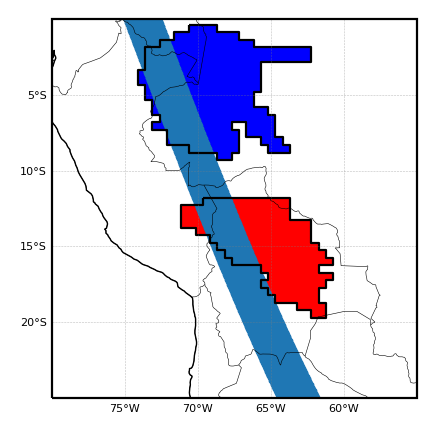

In [68]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,6.5),dpi=200)
gs = gridspec.GridSpec(2,3)
plt.style.use('default')

#=====================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.set_extent([-80,-55,-25,0],crs=proj)
# ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.1,zorder=5)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.2,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.2,color='black',zorder=4)

comm_GPD.loc[[3],'geometry'].plot(ax=ax1,facecolor='b')
comm_GPD.loc[[3],'geometry'].exterior.plot(ax=ax1,color='k',linestyle='-',linewidth=0.8)

comm_GPD.loc[[5],'geometry'].plot(ax=ax1,facecolor='r')
comm_GPD.loc[[5],'geometry'].exterior.plot(ax=ax1,color='k',linestyle='-',linewidth=0.8)

# ax1.scatter(lon,lat,s=top/np.nanmax(top))
ax1.scatter(lon,lat,s=0.1)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

In [65]:
lon.shape

(1893, 49)

In [62]:
lon[:,0],lat[:,0]

(array([-78.80789185, -78.79047394, -78.77310944, ..., -28.92851639,
        -28.86420631, -28.79978371]),
 array([ 15.4987936 ,  15.45767975,  15.41661358, ..., -57.16090393,
        -57.18754196, -57.21419525]))